<a href="https://colab.research.google.com/github/AdeelAhmed2001/deep-learning-assignments/blob/main/Credit_Card_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [29]:
creditcard_data=pd.read_csv("creditcard.csv")
display(creditcard_data)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53566,46047,-2.885416,-2.647887,1.903441,3.726885,3.800798,-1.644480,-1.924198,0.707696,-1.070468,1.025229,0.590276,0.531855,-0.873510,0.284279,-2.075755,0.588081,-0.515094,-0.437550,-1.863019,0.619500,0.284893,-0.268122,0.977417,0.136853,-1.144367,-0.535616,0.098494,0.305740,19.02,0.0
53567,46048,1.061410,0.045830,0.970401,1.102883,-0.490685,0.219968,-0.424285,0.235960,0.016498,0.116565,1.531313,1.074447,0.154534,0.294224,0.747177,0.415745,-0.593013,0.065704,-0.611904,-0.092446,0.033158,0.067127,0.053801,-0.010221,0.209877,-0.484136,0.057583,0.028018,28.70,0.0
53568,46048,-0.202740,0.295074,1.924698,1.009344,-0.235931,-0.272232,0.261015,-0.162146,-0.583849,0.361002,1.691854,0.931361,0.959252,-0.052824,1.124789,-0.237540,-0.265445,0.732205,1.543658,0.457057,0.321731,1.056540,0.093902,0.608566,-0.931546,0.466156,0.016695,-0.024568,54.81,0.0
53569,46048,-0.730116,0.796820,2.122484,-1.318082,0.019762,-0.857857,0.975752,-0.399896,0.359189,-0.053961,0.495669,0.292872,0.293502,-0.570330,0.745738,-0.056366,-0.444837,-1.099107,-1.270100,0.277419,-0.149736,0.093479,-0.056586,0.650087,-0.473889,0.662115,0.060486,-0.208536,4.53,0.0


In [30]:
creditcard_data.shape

(53571, 31)

In [31]:
creditcard_data.ndim

2

In [32]:
creditcard_data["V2"]

0       -0.072781
1        0.266151
2       -1.340163
3       -0.185226
4        0.877737
           ...   
53566   -2.647887
53567    0.045830
53568    0.295074
53569    0.796820
53570   -0.522991
Name: V2, Length: 53571, dtype: float64

In [33]:
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53571 entries, 0 to 53570
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    53571 non-null  int64  
 1   V1      53571 non-null  float64
 2   V2      53571 non-null  float64
 3   V3      53571 non-null  float64
 4   V4      53571 non-null  float64
 5   V5      53571 non-null  float64
 6   V6      53571 non-null  float64
 7   V7      53571 non-null  float64
 8   V8      53571 non-null  float64
 9   V9      53571 non-null  float64
 10  V10     53571 non-null  float64
 11  V11     53571 non-null  float64
 12  V12     53571 non-null  float64
 13  V13     53571 non-null  float64
 14  V14     53571 non-null  float64
 15  V15     53571 non-null  float64
 16  V16     53571 non-null  float64
 17  V17     53571 non-null  float64
 18  V18     53571 non-null  float64
 19  V19     53571 non-null  float64
 20  V20     53571 non-null  float64
 21  V21     53571 non-null  float64
 22

In [34]:
pd.isnull(creditcard_data).sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [35]:
creditcard_data=creditcard_data.fillna(creditcard_data.mean())
creditcard_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62000,0.000000
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69000,0.000000
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66000,0.000000
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50000,0.000000
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53566,46047,-2.885416,-2.647887,1.903441,3.726885,3.800798,-1.644480,-1.924198,0.707696,-1.070468,1.025229,0.590276,0.531855,-0.873510,0.284279,-2.075755,0.588081,-0.515094,-0.437550,-1.863019,0.619500,0.284893,-0.268122,0.977417,0.136853,-1.144367,-0.535616,0.098494,0.305740,19.02000,0.000000
53567,46048,1.061410,0.045830,0.970401,1.102883,-0.490685,0.219968,-0.424285,0.235960,0.016498,0.116565,1.531313,1.074447,0.154534,0.294224,0.747177,0.415745,-0.593013,0.065704,-0.611904,-0.092446,0.033158,0.067127,0.053801,-0.010221,0.209877,-0.484136,0.057583,0.028018,28.70000,0.000000
53568,46048,-0.202740,0.295074,1.924698,1.009344,-0.235931,-0.272232,0.261015,-0.162146,-0.583849,0.361002,1.691854,0.931361,0.959252,-0.052824,1.124789,-0.237540,-0.265445,0.732205,1.543658,0.457057,0.321731,1.056540,0.093902,0.608566,-0.931546,0.466156,0.016695,-0.024568,54.81000,0.000000
53569,46048,-0.730116,0.796820,2.122484,-1.318082,0.019762,-0.857857,0.975752,-0.399896,0.359189,-0.053961,0.495669,0.292872,0.293502,-0.570330,0.745738,-0.056366,-0.444837,-1.099107,-1.270100,0.277419,-0.149736,0.093479,-0.056586,0.650087,-0.473889,0.662115,0.060486,-0.208536,4.53000,0.000000


In [36]:
pd.isnull(creditcard_data).sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [37]:
x=creditcard_data.iloc[:,:30]
y=creditcard_data.iloc[:,30]


In [38]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels=train_test_split(x,y,test_size=0.30,random_state=69)

In [39]:
train_data=np.asarray(train_data)
test_data=np.asarray(test_data)

In [40]:
train_data[2]

array([ 1.72130000e+04, -2.41322174e+00, -4.48116316e-01,  1.66513715e+00,
        8.36478897e-01, -2.92468051e+00,  3.47786006e+00,  3.47372748e+00,
       -1.47809427e+00,  9.93267631e-01, -4.77322716e-01,  2.35592044e+00,
       -2.60446663e+00,  1.05113340e+00,  6.44773427e-01, -1.08734358e+00,
        9.81962801e-01, -4.19516307e-02, -2.22700039e-01, -2.14564452e+00,
       -1.22553547e+00,  3.40198538e-01,  2.69291305e-01, -1.71839206e-01,
       -2.18645006e-01,  5.28914456e-02,  8.89935334e-01,  8.58807579e-02,
       -5.09234554e-01,  8.67760000e+02])

In [41]:
train_labels=np.asarray(train_labels)
test_labels=np.asarray(test_labels)

In [42]:
train_labels[18]

0.0

In [43]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(30,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [44]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
history=model.fit(train_data,train_labels,epochs=60,validation_split=0.2)

Epoch 1/60
938/938 [==============================] - 2s 2ms/step - loss: 198.0255 - accuracy: 0.8958 - val_loss: 0.3462 - val_accuracy: 0.9968
Epoch 2/60
938/938 [==============================] - 1s 1ms/step - loss: 2.5555 - accuracy: 0.9789 - val_loss: 1.2960 - val_accuracy: 0.9969
Epoch 3/60
938/938 [==============================] - 1s 1ms/step - loss: 2.4663 - accuracy: 0.9857 - val_loss: 0.7298 - val_accuracy: 0.9971
Epoch 4/60
938/938 [==============================] - 1s 1ms/step - loss: 3.2738 - accuracy: 0.9843 - val_loss: 0.6258 - val_accuracy: 0.9971
Epoch 5/60
938/938 [==============================] - 1s 1ms/step - loss: 4.1288 - accuracy: 0.9845 - val_loss: 1.1427 - val_accuracy: 0.9969
Epoch 6/60
938/938 [==============================] - 1s 1ms/step - loss: 2.6549 - accuracy: 0.9846 - val_loss: 0.3372 - val_accuracy: 0.9973
Epoch 7/60
938/938 [==============================] - 1s 1ms/step - loss: 3.0973 - accuracy: 0.9861 - val_loss: 0.3708 - val_accuracy: 0.9975
Epoc

In [46]:
test_loss,test_acc=model.evaluate(test_data,test_labels)
print("test_loss:",test_loss,"test_accuracy:",test_acc)


503/503 [==============================] - 0s 867us/step - loss: 0.0256 - accuracy: 0.9988
test_loss: 0.025621745735406876 test_accuracy: 0.9988178014755249


In [47]:
model.predict(test_data)


array([[2.0667255e-19],
       [1.0283752e-09],
       [9.1551788e-18],
       ...,
       [4.6377209e-20],
       [8.3680176e-29],
       [1.2238698e-17]], dtype=float32)

In [48]:
 history_dict = history.history

In [49]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

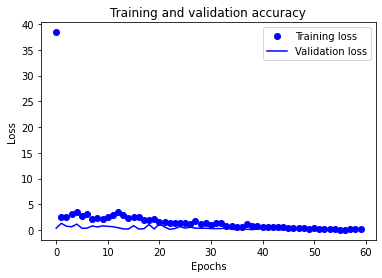

In [50]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(60)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

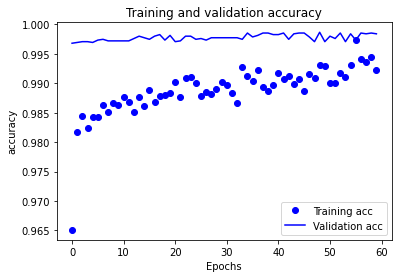

In [51]:
acc_values = history_dict['accuracy'] 
val_acc_values = history_dict['val_accuracy'] 
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy') 
plt.legend()
plt.show()

In [ ]:
model.predict(test_data)[2]

array([2.0422345e-19], dtype=float32)